## Q3: Conduct a customer lifetime value prediction for an insurance company.

* Student ID: p233340 
* Name: Kwok Tsz Yi
* Course: COM6101

In [153]:
# import dataset
import pandas as pd
df = pd.read_csv('Q3.csv')
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1.0,5.0,5790.0,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0.0,8.0,5080.0,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1.0,8.0,2599.0,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0.0,7.0,0.0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1.0,6.0,3508.0,More than 1,A,Gold,59736.0


### Exploratory Data Analysis

Find the shape of the data, the data types of the columns, and the first few rows of the data.

In [154]:
df.shape

(9954, 12)

In [155]:
df.dtypes

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

In [156]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,9954.000000,9953.000000,9953.000000,9953.000000,9952.000000
mean,4977.500000,0.579323,4.641515,4361.435346,98710.847267
std,2873.616624,0.493693,2.269143,3281.160576,91154.356054
min,1.000000,0.000000,-1.000000,0.000000,27432.000000
25%,2489.250000,0.000000,3.000000,2415.000000,53280.000000
50%,4977.500000,1.000000,5.000000,4099.000000,66108.000000
75%,7465.750000,1.000000,6.000000,6100.000000,103812.000000
max,9954.000000,1.000000,8.000000,31894.000000,650964.000000


Find missing values in each columns:

In [157]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            1
marital_status    1
vintage           1
claim_amount      1
num_policies      1
policy            1
type_of_policy    1
cltv              2
dtype: int64

As the number of missing values is small, we can drop the rows with missing values.

In [158]:
df = df.dropna()
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

### Data Preprocessing

In [159]:
df.dtypes

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

As per the dtype, there are 6 columns need to be transformed to numerical data type. For column gender, area, policy and qualification, as they are non-ordinal categorical data, we can use one-hot encoding to transform them. For column income, num_policies and type_of_policy, as they are ordinal categorical data, we can use label encoding to transform them.

#### One-hot encoding

Columns to perform one-hot encoding:
* gender
* area
* policy
* qualification

In [160]:
# replace df['gender'] with dummy variables
df = df.join(pd.get_dummies(df['gender']))
df = df.join(pd.get_dummies(df['area']))
df = df.join(pd.get_dummies(df['policy']))
df = df.join(pd.get_dummies(df['qualification']))
df = df.drop(['gender', 'area', 'policy', 'qualification'], axis=1)
df.head()

,id,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,1,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,False,True,False,True,True,False,False,False,True,False,False
1,2,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,False,True,True,False,True,False,False,False,False,True,False
2,3,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,False,True,False,True,True,False,False,False,True,False,False
3,4,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,True,False,True,False,True,False,False,False,False,True,False
4,5,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,False,True,False,True,True,False,False,False,False,True,False


In [161]:
# transform boolean to int
for i in range(0, len(df.columns)):
    if df.iloc[:, i].dtype == bool:
        df.iloc[:, i] = df.iloc[:, i].astype(int)
df.dtypes

id                  int64
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
type_of_policy     object
cltv              float64
Female              int32
Male                int32
Rural               int32
Urban               int32
A                   int32
B                   int32
C                   int32
D                   int32
Bachelor            int32
High School         int32
Others              int32
dtype: object

In [162]:
df.head()

,id,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,1,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,0,1,0,1,1,0,0,0,1,0,0
1,2,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,0,1,1,0,1,0,0,0,0,1,0
2,3,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,0,1,0,1,1,0,0,0,1,0,0
3,4,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,1,0,1,0,1,0,0,0,0,1,0
4,5,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,0,1,0,1,1,0,0,0,0,1,0


#### Ordinal encoding

In [163]:
# transform type_of_policy to numeric
# display value_counts
df['type_of_policy'].value_counts()

type_of_policy
Platinum    5395
Gold        2285
Silver      2272
Name: count, dtype: int64

In [164]:
# silver = 0, gold = 1, platinum = 2
df['type_of_policy'] = df['type_of_policy'].map({'Silver': 0, 'Gold': 1, 'Platinum': 2})
df['type_of_policy'].value_counts()

type_of_policy
2    5395
1    2285
0    2272
Name: count, dtype: int64

In [165]:
# transform num_policies to numeric 
# display value_counts
df['num_policies'].value_counts()

num_policies
More than 1    6719
1              3233
Name: count, dtype: int64

In [166]:
# map more than 1 policy to 1, 1 policy to 0
df['num_policies'] = df['num_policies'].map({'1': 0, 'More than 1':1})
df['num_policies'].value_counts()

num_policies
1    6719
0    3233
Name: count, dtype: int64

In [167]:
# transform income column to numeric
# discover unique values in income column first
df['income'].value_counts()

income
5L-10L           5797
2L-5L            2417
More than 10L    1507
<=2L              231
Name: count, dtype: int64

Encoding the df['income'] column to numerical data type, e.g. '<=2L' to 1, '2L-5L' to 2.

In [168]:
# encode income column
df['income'] = df['income'].map({'<=2L': 0, '2L-5L': 1, '5L-10L': 2, 'More than 10L': 3})
df['income'].value_counts()

income
2    5797
1    2417
3    1507
0     231
Name: count, dtype: int64

In [169]:
# rearrange columns: cltv to the end
cols = list(df.columns)
cols.remove('cltv')
cols.append('cltv')
df = df[cols]
df.head()

,id,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others,cltv
0,1,2,1.0,5.0,5790.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64308.0
1,2,2,0.0,8.0,5080.0,1,2,0,1,1,0,1,0,0,0,0,1,0,515400.0
2,3,2,1.0,8.0,2599.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64212.0
3,4,2,0.0,7.0,0.0,1,2,1,0,1,0,1,0,0,0,0,1,0,97920.0
4,5,3,1.0,6.0,3508.0,1,1,0,1,0,1,1,0,0,0,0,1,0,59736.0


#### Outlier detection and removal:

In [170]:
# outlier detection
import numpy as np
from scipy.stats import zscore
z = np.abs(zscore(df))
# threshold = 3
threshold = 3
df = df[(z < 3).all(axis=1)]
df.shape

### Predict customer lifetime value via linear regression model

In [171]:
# split data into train and test, exclude column id from feature attributes
# cltv is the target variable
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X, y

(      income  marital_status  vintage  claim_amount  num_policies  \
 0          2             1.0      5.0        5790.0             1   
 1          2             0.0      8.0        5080.0             1   
 2          2             1.0      8.0        2599.0             1   
 3          2             0.0      7.0           0.0             1   
 4          3             1.0      6.0        3508.0             1   
 ...      ...             ...      ...           ...           ...   
 9948       2             0.0      7.0        4938.0             1   
 9949       1             0.0      8.0        6662.0             1   
 9950       2             0.0      1.0        2222.0             0   
 9951       1             1.0      1.0        5407.0             1   
 9952       2             1.0      6.0           0.0             0   
 
       type_of_policy  Female  Male  Rural  Urban  A  B  C  D  Bachelor  \
 0                  2       0     1      0      1  1  0  0  0         1   
 1      

In [172]:
# split data into train and test, test size = 0.3, random_state = 40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
# find the coefficients of the model
coef = pd.DataFrame(list(zip(X, model.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,income,-2203.193111
1,marital_status,-7062.743419
2,vintage,-450.089445
3,claim_amount,2.532636
4,num_policies,66885.382056
5,type_of_policy,-437.728095
6,Female,-2314.001411
7,Male,2314.001411
8,Rural,-4036.150935
9,Urban,4036.150935


In [174]:
#MSE and R2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mse_insample = mean_squared_error(y_train, model.predict(X_train))
mse_outsample = mean_squared_error(y_test, y_pred)
r2_insample = r2_score(y_train, model.predict(X_train))
r2_outsample = r2_score(y_test, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 6988810031.547153
MSE out-sample: 7099775327.57135
R2 in-sample: 0.15621215280155132
R2 out-sample: 0.15156075390225066


Text(0.5, 1.0, 'Actual vs Predicted')

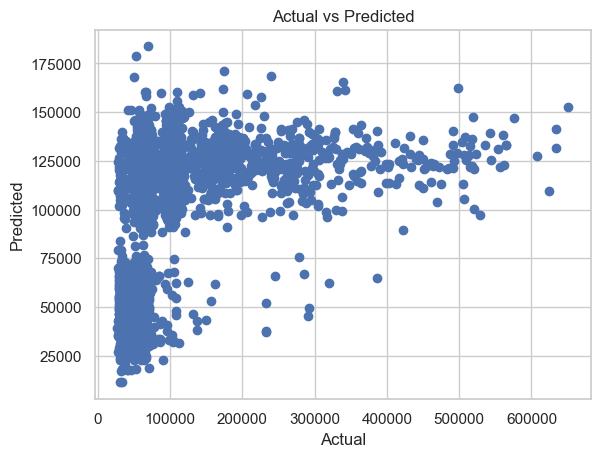

In [175]:
# plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

As some features attributes having a higher value than others, we need to scale the features. Let's try using min-max scaling, standard scaling and robust scaling to see which scaling method is the best.

#### Min-max scaling

In [176]:
# min-max scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(df.iloc[:, 1:-1])

# split the min-max scaled data into train and test
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.3, random_state=40)
X_minmax, y

(array([[0.66666667, 1.        , 0.66666667, ..., 1.        , 0.        ,
         0.        ],
        [0.66666667, 0.        , 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.66666667, 1.        , 1.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.66666667, 0.        , 0.22222222, ..., 0.        , 1.        ,
         0.        ],
        [0.33333333, 1.        , 0.22222222, ..., 0.        , 1.        ,
         0.        ],
        [0.66666667, 1.        , 0.77777778, ..., 0.        , 1.        ,
         0.        ]]),
 0        64308.0
 1       515400.0
 2        64212.0
 3        97920.0
 4        59736.0
           ...   
 9948     61116.0
 9949    158784.0
 9950     32940.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 9952, dtype: float64)

In [177]:
# train a linear regression model on scaled data
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)

# find the coefficients of the model after min-max scaling
coef_scale_minmax = pd.DataFrame(list(zip(X, model_minmax.coef_)))
coef_scale_minmax.columns = ['feature', 'coef']
coef_scale_minmax

,feature,coef
0,income,-7.370064e+03
1,marital_status,-6.646428e+03
2,vintage,-4.543257e+03
3,claim_amount,7.957460e+04
4,num_policies,6.709453e+04
5,type_of_policy,-1.411106e+03
6,Female,-1.595017e+18
7,Male,-1.595017e+18
8,Rural,-1.236724e+18
9,Urban,-1.236724e+18


In [178]:
# check the MSE and R2 of the model on min-max scaled data
y_pred = model_minmax.predict(X_test_minmax)
mse_insample = mean_squared_error(y_train_minmax, model_minmax.predict(X_train_minmax))
mse_outsample = mean_squared_error(y_test_minmax, y_pred)
r2_insample = r2_score(y_train_minmax, model_minmax.predict(X_train_minmax))
r2_outsample = r2_score(y_test_minmax, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 6990721014.479472
MSE out-sample: 7102718105.371735
R2 in-sample: 0.15598143195390834
R2 out-sample: 0.15120908528413313


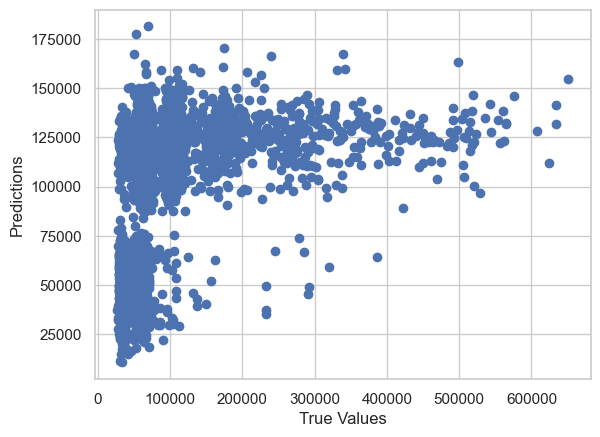

In [179]:
# fitted line plot for model generated from min-max scaled data
import matplotlib.pyplot as plt
plt.scatter(y_test_minmax, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Standard scaling

In [180]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(df.iloc[:, 1:-1])

# split the standardized data into train and test
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size=0.2, random_state=40)
X_standard, y

(array([[ 0.20149273,  0.85204453,  0.15781017, ...,  1.11556018,
         -1.03414366, -0.19787954],
        [ 0.20149273, -1.17364758,  1.48017351, ..., -0.89641063,
          0.96698364, -0.19787954],
        [ 0.20149273,  0.85204453,  1.48017351, ...,  1.11556018,
         -1.03414366, -0.19787954],
        ...,
        [ 0.20149273, -1.17364758, -1.60534094, ..., -0.89641063,
          0.96698364, -0.19787954],
        [-1.2600639 ,  0.85204453, -1.60534094, ..., -0.89641063,
          0.96698364, -0.19787954],
        [ 0.20149273,  0.85204453,  0.59859795, ..., -0.89641063,
          0.96698364, -0.19787954]]),
 0        64308.0
 1       515400.0
 2        64212.0
 3        97920.0
 4        59736.0
           ...   
 9948     61116.0
 9949    158784.0
 9950     32940.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 9952, dtype: float64)

In [181]:
# train a linear regression model on standardized data
model_standard = LinearRegression()
model_standard.fit(X_train_standard, y_train_standard)

# find the coefficients of the model after standardization
coef_scale_standard = pd.DataFrame(list(zip(X, model_standard.coef_)))
coef_scale_standard.columns = ['feature', 'coef']
coef_scale_standard

,feature,coef
0,income,-5.548418e+03
1,marital_status,-3.719069e+03
2,vintage,8.022574e+01
3,claim_amount,8.818168e+03
4,num_policies,3.100867e+04
5,type_of_policy,-1.591951e+03
6,Female,-3.598727e+16
7,Male,-3.598727e+16
8,Rural,5.632690e+18
9,Urban,5.632690e+18


In [182]:
# check the MSE and R2 of the model on standardized data
y_pred = model_standard.predict(X_test_standard)
mse_insample = mean_squared_error(y_train_standard, model_standard.predict(X_train_standard))
mse_outsample = mean_squared_error(y_test_standard, y_pred)
r2_insample = r2_score(y_train_standard, model_standard.predict(X_train_standard))
r2_outsample = r2_score(y_test_standard, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 7115257195.481537
MSE out-sample: 6759581967.422377
R2 in-sample: 0.15341168171579422
R2 out-sample: 0.14669382919048446


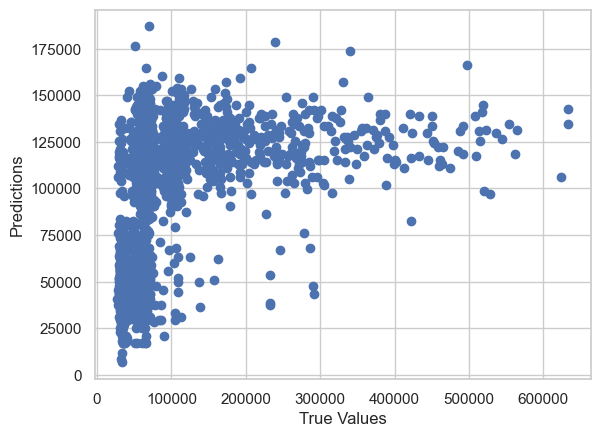

In [183]:
# fitted line plot
plt.scatter(y_test_standard, y_pred)
# plot the model coefficients
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Robust scaling

In [184]:
# robust scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_robust = scaler.fit_transform(df.iloc[:, 1:-1])

# split the robust scaled data into train and test
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_robust, y, test_size=0.2, random_state=40)
X_robust, y

(array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         -1.        ,  0.        ],
        [ 0.        , -1.        ,  1.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         -1.        ,  0.        ],
        ...,
        [ 0.        , -1.        , -1.33333333, ...,  0.        ,
          0.        ,  0.        ],
        [-1.        ,  0.        , -1.33333333, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33333333, ...,  0.        ,
          0.        ,  0.        ]]),
 0        64308.0
 1       515400.0
 2        64212.0
 3        97920.0
 4        59736.0
           ...   
 9948     61116.0
 9949    158784.0
 9950     32940.0
 9951     61200.0
 9952     37692.0
 Name: cltv, Length: 9952, dtype: float64)

In [185]:
# train a linear regression model on robust scaled data
model_robust = LinearRegression()
model_robust.fit(X_train_robust, y_train_robust)

# find the coefficients of the model after robust scaling
coef_scale_robust = pd.DataFrame(list(zip(X, model_robust.coef_)))
coef_scale_robust.columns = ['feature', 'coef']
coef_scale_robust

,feature,coef
0,income,-3.257172e+03
1,marital_status,-5.438771e+03
2,vintage,-5.808460e+02
3,claim_amount,9.650085e+03
4,num_policies,6.809062e+04
5,type_of_policy,-5.568723e+02
6,Female,1.009213e+17
7,Male,1.009213e+17
8,Rural,-7.438247e+16
9,Urban,-7.438247e+16


In [186]:
# check the MSE and R2 of the model on robust scaled data
y_pred = model_robust.predict(X_test_robust)
mse_insample = mean_squared_error(y_train_robust, model_robust.predict(X_train_robust))
mse_outsample = mean_squared_error(y_test_robust, y_pred)
r2_insample = r2_score(y_train_robust, model_robust.predict(X_train_robust))
r2_outsample = r2_score(y_test_robust, y_pred)

print('MSE in-sample:', mse_insample)
print('MSE out-sample:', mse_outsample)
print('R2 in-sample:', r2_insample)
print('R2 out-sample:', r2_outsample)

MSE in-sample: 7097157739.268666
MSE out-sample: 6726267950.056809
R2 in-sample: 0.15556519321596085
R2 out-sample: 0.1508992751381033


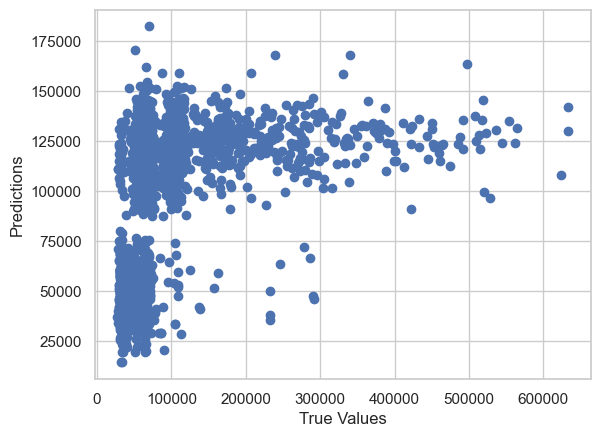

In [187]:
# fitted line plot
plt.scatter(y_test_robust, y_pred)
# plot the model coefficients
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()